# Разработка стретегии взаимодействия с клиентами, в т.ч. прогнозирование вероятности оттока, с помощью машинного обучения для сети фитнес-центров «Культурист-датасаентист»

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.

Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. 

Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал, т.е. если он начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.

Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Наша задача — провести анализ и подготовить план действий по удержанию клиентов.

**Задача**
- научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- проанализировать основные признаки, наиболее сильно влияющие на отток;
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
    - выделить целевые группы клиентов;
    - предложить меры по снижению оттока;
    - определить другие особенности взаимодействия с клиентами.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Импортирование-библиотек-и-данных-из-файла" data-toc-modified-id="Импортирование-библиотек-и-данных-из-файла-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Импортирование библиотек и данных из файла</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Построение-столбчатых-гистограмм-и-распределения-признаков-для-тех,-кто-ушёл-(отток)-и-тех,-кто-остался-(не-попали-в-отток)" data-toc-modified-id="Построение-столбчатых-гистограмм-и-распределения-признаков-для-тех,-кто-ушёл-(отток)-и-тех,-кто-остался-(не-попали-в-отток)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Построение столбчатых гистограмм и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)</a></span></li><li><span><a href="#Построение-матрицы-корреляций" data-toc-modified-id="Построение-матрицы-корреляций-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Построение матрицы корреляций</a></span></li></ul></li><li><span><a href="#Построение-модели-прогнозирования-оттока-клиентов" data-toc-modified-id="Построение-модели-прогнозирования-оттока-клиентов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Построение модели прогнозирования оттока клиентов</a></span><ul class="toc-item"><li><span><a href="#Обучение-модели-на-train-выборке-логистической-регрессией" data-toc-modified-id="Обучение-модели-на-train-выборке-логистической-регрессией-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Обучение модели на train-выборке логистической регрессией</a></span></li><li><span><a href="#Обучение-модели-на-train-выборке-случайным-лесом" data-toc-modified-id="Обучение-модели-на-train-выборке-случайным-лесом-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Обучение модели на train-выборке случайным лесом</a></span></li></ul></li><li><span><a href="#Кластеризация-клиентов" data-toc-modified-id="Кластеризация-клиентов-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Кластеризация клиентов</a></span><ul class="toc-item"><li><span><a href="#Построение-матрицы-расстояний" data-toc-modified-id="Построение-матрицы-расстояний-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Построение матрицы расстояний</a></span></li><li><span><a href="#Обучение-модели-кластеризации-на-основании-алгоритма-K-Means" data-toc-modified-id="Обучение-модели-кластеризации-на-основании-алгоритма-K-Means-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Обучение модели кластеризации на основании алгоритма K-Means</a></span></li></ul></li><li><span><a href="#Выводы-и-рекомендации" data-toc-modified-id="Выводы-и-рекомендации-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы и рекомендации</a></span><ul class="toc-item"><li><span><a href="#Общие-итоги:" data-toc-modified-id="Общие-итоги:-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Общие итоги:</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Рекомендации" data-toc-modified-id="Рекомендации-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Рекомендации</a></span></li></ul></li></ul></div>

## Описание данных

«Культурист-датасаентист» предоставил сведения в csv-файлах. Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. Набор данных включает следующие поля:

- **'Churn'** — факт оттока в текущем месяце;
- Текущие поля в датасете:
    - Данные клиента за предыдущий до проверки факта оттока месяц:
        - **'gender'** — пол;
        - **'Near_Location'** — проживание или работа в районе, где находится фитнес-центр;
        - **'Partner'** — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
        - **'Promo_friends'** — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
        - **'Phone'** — наличие контактного телефона;
        - **'Age'** — возраст;
        - **'Lifetime'** — время с момента первого обращения в фитнес-центр (в месяцах).
- Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
    - **'Contract_period'** — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
    - **'Month_to_end_contract'** — срок до окончания текущего действующего абонемента (в месяцах);
    - **'Group_visits'** — факт посещения групповых занятий;
    - **'Avg_class_frequency_total'** — средняя частота посещений в неделю за все время с начала действия абонемента;
    - **'Avg_class_frequency_current_month'** — средняя частота посещений в неделю за предыдущий месяц;
    - **'Avg_additional_charges_total'** — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

## Импортирование библиотек и данных из файла

In [1]:
import pandas as pd
import numpy as np 
import pylab
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, LogisticRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, silhouette_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import KMeans
import itertools

In [2]:
df = pd.read_csv('/datasets/gym_churn.csv')
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Данные загружены, отображаются корректно, в них нет временных показателей (дат). Необходимо изменить названия столбцов для удобства (привести к нижнему регистру).

## Исследовательский анализ данных

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


Данные хорошие, пропусков нет. Всего мы имеем данные о 4 тыс клиентов.

In [4]:
df.duplicated().sum()

0

Дубликатов нет.

In [5]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
Near_Location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
Partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
Promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
Phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
Contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
Group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
Age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
Avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
Month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


Данные распределены корректно, однако неравномерно.

На данном этапе исследования можно сказать: 
- у нас есть данные по посетителям от 18 до 41 года
- имеются данные о мужчинах и женщинах, в выборке и тех, и других примерно равное количество (среднее = 0,51, медиана = 1)

Приведем названия столбцов к нижнему регистру:

In [6]:
df.columns = df.columns.str.lower()
df.columns.to_list()

['gender',
 'near_location',
 'partner',
 'promo_friends',
 'phone',
 'contract_period',
 'group_visits',
 'age',
 'avg_additional_charges_total',
 'month_to_end_contract',
 'lifetime',
 'avg_class_frequency_total',
 'avg_class_frequency_current_month',
 'churn']

Названия столбцов изменены.

Теперь посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался:

In [7]:
churn_group = df.groupby('churn').agg('mean').T
churn_group

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


Признаки распределены вокруг целевой переменной достаточно неравномерно, учтем это при дальнейшей работе.

Сейчас можно сказать, что:
- чуть больше остаются те, кто живет рядом
- больше пользователи склонны оставаться по партнерским программам и акциям "приведи друга"
- чаще уходят те, кто заключил краткосрочные контракты, в отличии от тех, кто занимается по долгосрочным.

### Построение столбчатых гистограмм и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

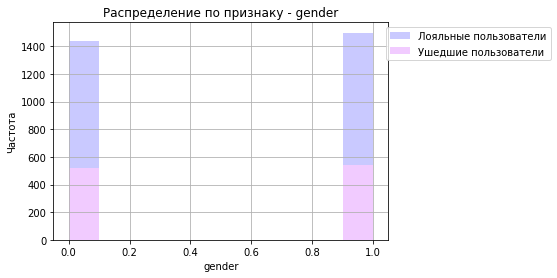

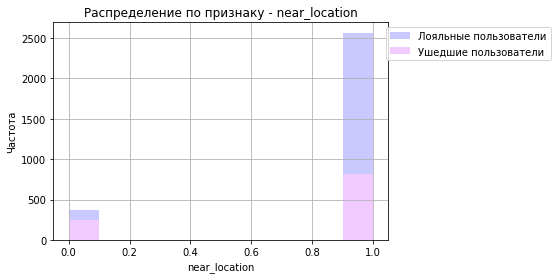

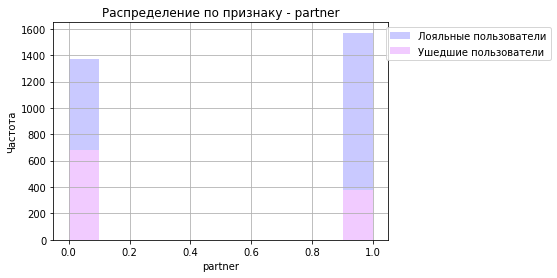

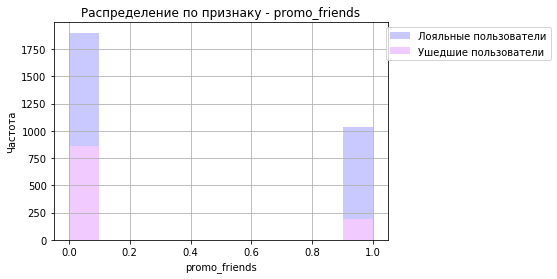

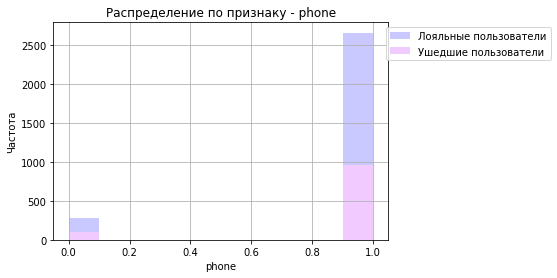

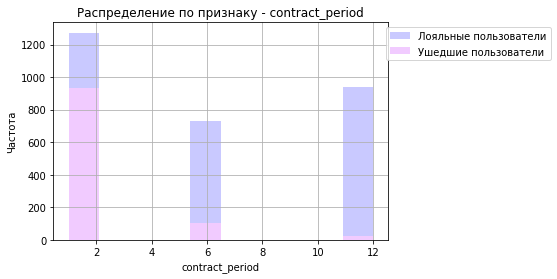

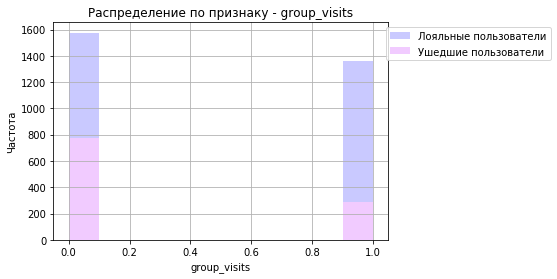

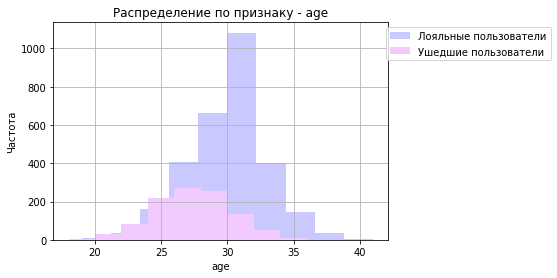

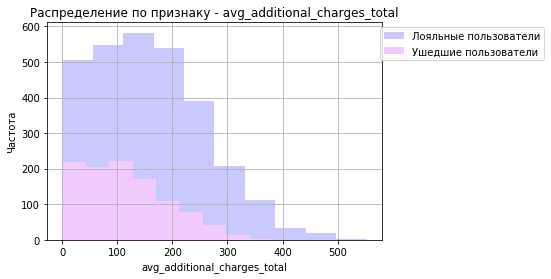

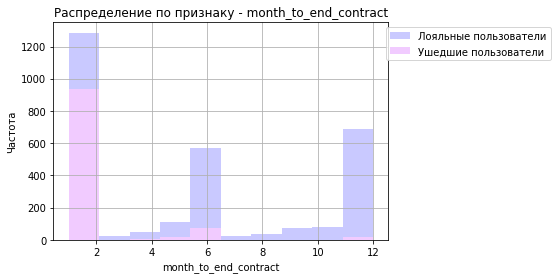

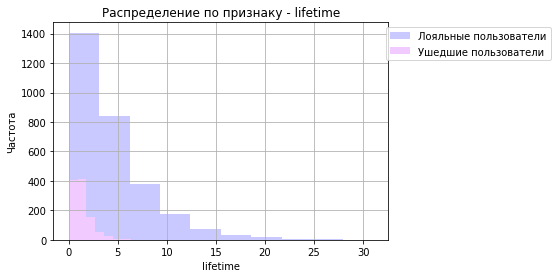

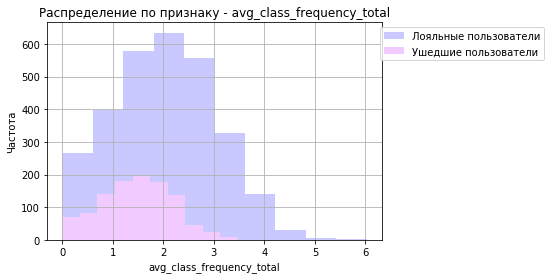

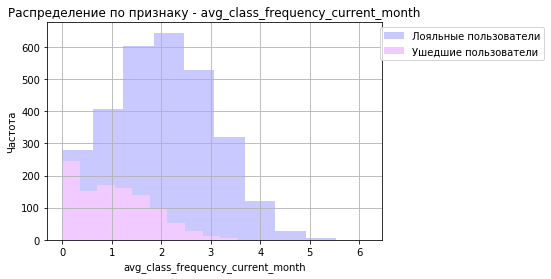

In [8]:
for i in df.drop('churn', axis=1).columns:
    df.query('churn==0')[i].hist(bins=10,
                                 color=['#c9c9ff'],
                                 label='Лояльные пользователи')
    
    df.query('churn==1')[i].hist(bins=10, 
                                 color=['#f1cbff'], 
                                 label='Ушедшие пользователи')
  
    plt.title('Распределение по признаку' + ' - ' + i)
    
    plt.xlabel(i)
    plt.ylabel('Частота')
    plt.legend(bbox_to_anchor=(1.5, 1))
    
    plt.show()

Пол – распределен примерно одинаково, на отток, по всей вероятности, не влияет.
Близость расположения к фитнес-центру – на графике видим, что у нас гораздо больше пользователей, которые живут рядом, среди них доля оттока значительно меньше, в сравнении с оттоком среди живущих далеко.

Сотрудники компаний-партнеров клуба – общее количество посетителей вне зависимости их статуса, представлены почти равномерно. Однако, среди клиентов являющихся сотрудниками компаний-партнеров, число лояльных посетителей значительно больше, чем ушедших, а среди тех, кто не является сотрудником, количество лояльных и ушедших примерно равно.

Акция «Приведи друга» - количество посетителей, пришедших по этой акции почти в два раза меньше, чем обычных. Однако, среди акционных клиентов примерно ¾ - лояльные, а вот среди обычных посетителей около половины попадают в отток.

Контактный телефон – в нашей баз представлено подавляющее количество посетителей, оставивших свой номер, однако, по графику можно сказать, что это не влияет на лояльность.

Длительность абонемента – в информации о данных было сказано о длительности абонементов в 1, 3, 6, 12 месяцев, однако абонементы в 3 месяца в нашу выборку не попали. На графике видим, что чем длительнее абонемент, тем больше количество лояльных посетителей, также стоит отметить, что среди тех, у кого абонемент длится 1 месяц примерно четверть не попадает в отток.

Посещение групповых занятий – количество всех посетителей делятся примерно равными долями, однако среди тех, кто посещает групповые занятия примерно в 4 раза больше лояльных клиентов, а среди тех, кто не посещает – около половины в итоге уходят.

Возраст – все посетители фитнес-центров – это люди от 18 до 41 года. Притом мы наблюдаем, что чем старше возраст – тем бОльшая вероятность, что человек останется. До 25 лет склонность уйти или остаться примерно равна, более старшие возраста – больше вероятность остаться. Основной контингент посетителей – 25 – 35 лет, с пиком около 30.

Суммарная выручка от других услуг – в целом распределение асимметричное, правостороннее. По графику можно сказать, что лояльные клиенты гораздо больше склонны приобретать сопутствующие услуги в фитнес-центрах – отличие от ушедших более чем в два раза.

Срок до окончания текущего действующего абонемента – дублирует выводы по длительности абонементов – чем длительнее абонемент – тем более лояльный клиент, абонемент на 1 месяц – отток почти ¾ посетителей.

Время с момента первого обращения в фитнес-центр (в месяцах) – судя по графику – чем дольше человек посещает фитнес-центр, тем больше вероятность, что он останется. Больше всего уходят в первые пару месяцев, а в целом – в первые полгода. В наших данных представлено больше всего посетителей с Lifetime около 3 и 6 месяцев, далее количество постепенно уменьшается, самые долгие посещения – около 2х лет.

Средняя частота посещений в неделю за все время с начала действия абонемента – среди лояльных клиентов частота занятий в среднем 1-4 раза в неделю, реже до 6 раз. Среди попавших в отток – 0-2 раза в неделю, реже 3 раза. Можно сказать, что если человек стабильно занимается 2-4 раза в неделю – бОльшая вероятность, что он останется и далее.

Средняя частота посещений в неделю за предыдущий месяц – примерно та же картина, что и количество посещений за весь период, разве что в ушедших клиентах можно отметить, что их посещения стремятся к 0 или реже 1-2 раза в неделю.

В итоге, можем сказать, что пол и наличие контактного телефона скорей всего не влияют на отток клиентов, а все остальные показатели имеют обратное влияние на целевую переменную в разной степени силы.

### Построение матрицы корреляций

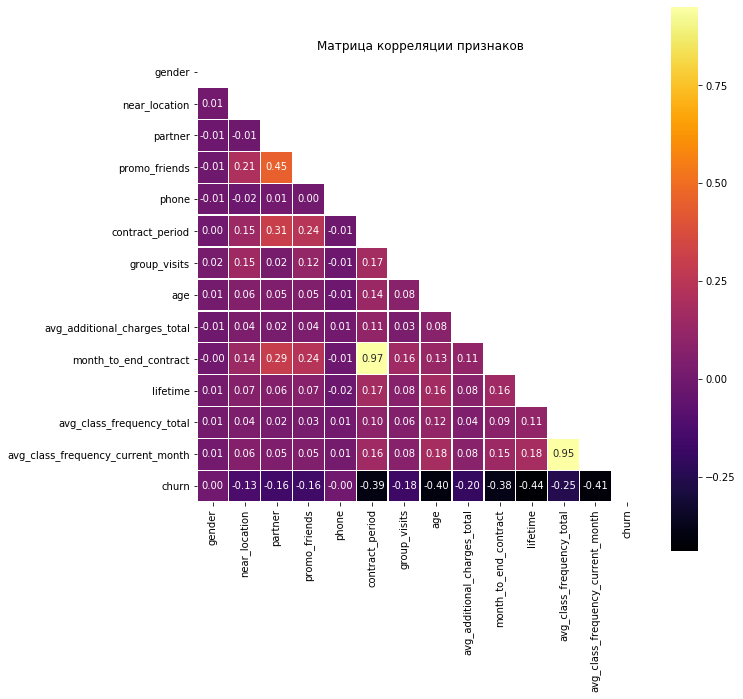

In [9]:
corr = df.corr()

plt.figure(figsize = (10, 10))

mask = np.triu(np.ones_like(corr, dtype=np.bool))

sns.heatmap(corr, 
            square = True, 
            annot = True, 
            mask=mask,
            fmt=".2f", 
            cmap='inferno',
            linewidths=.42, 
            vmax=.95)

plt.title('Матрица корреляции признаков')
plt.show()

По матрице корреляций можно также сказать, что мы не наблюдаем сильно скоррелированных признаков для целевой переменной. Однако, мы видим, что есть корреляция между показателями, описывающими длительность абонементов, вероятно, наблюдение было проведено на этапе близком к покупке каждого из абонементов. Также стоит отметить корреляцию признаков, которые описывают частоту посещения фитнес-центров - она говорит о том, что скорей всего, клиенты посещают занятия какое-то постоянное для себя количество раз, поэтому данный показатель не изменяется во времени.

**Вывод:**

Данные хорошие, распределены корректно, однако неравномерно, в них нет временных показателей (дат). Пропусков нет. Всего мы имеем данные о 4 тыс клиентов. Дубликатов нет. Названия столбцов приведены к нижнему регистру.

На данном этапе можно сказать:
- чуть больше остаются те, кто живет рядом
- больше пользователи склонны оставаться по партнерским программам и акциям "приведи друга"
- чаще уходят те, кто заключил краткосрочные контракты, в отличии от тех, кто занимается по долгосрочным.

Мы можем сказать, что пол и наличие контактного телефона скорей всего не влияют на отток клиентов, а все остальные показатели имеют обратное влияние на целевую переменную в разной степени силы.

По матрице корреляций мы не наблюдаем сильно скоррелированных признаков для целевой переменной. Однако, мы видим, что есть корреляция между показателями, описывающими длительность абонементов, вероятно, наблюдение было проведено на этапе близком к покупке каждого из абонементов. Также стоит отметить корреляцию признаков, которые описывают частоту посещения фитнес-центров - она говорит о том, что скорей всего, клиенты посещают занятия какое-то постоянное для себя количество раз, поэтому данный показатель не изменяется во времени.

## Построение модели прогнозирования оттока клиентов

Определим переменные:
y - целевой признак - факт оттока клиентов
x - признаки целевой переменной

In [10]:
y = df['churn']
x = df.drop('churn', axis=1)

Разобьем данные на обучающую и валидационную выборку (80% и 20%) функцией train_test_split(), с параметром random_state = 0.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

### Обучение модели на train-выборке логистической регрессией

Зададим алгоритм для нашей модели:

In [12]:
lr_model = LogisticRegression(solver='liblinear')

Обучим модель:

In [13]:
lr_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Воспользуемся обученной моделью, чтобы сделать прогнозы:

In [14]:
predictions = lr_model.predict(X_test)
probabilities = lr_model.predict_proba(X_test)[:, 1]

Выведем изученные метрики для полученного прогноза:

In [15]:
print('Accuracy: {:.2f}' .format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}' .format(precision_score(y_test, predictions)))
print('Recall: {:.2f}' .format(recall_score(y_test, predictions)))

Accuracy: 0.93
Precision: 0.86
Recall: 0.83


Модель логистической регрессии достаточно хорошо себя показала,

особенно:
- доля правильных ответов (accuracy),

и чуть ниже по показателям:

- точность (precision),
- полнота (recall)

### Обучение модели на train-выборке случайным лесом

Зададим алгоритм для модели:

In [16]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)

Обучим модель случайного леса

In [17]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Воспользуемся обученной моделью, чтобы сделать прогнозы:

In [18]:
rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)[:, 1]

Выведем все изученные метрики для полученного прогноза:

In [19]:
print('Accuracy: {:.2f}' .format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}' .format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}' .format(recall_score(y_test, rf_predictions)))

Accuracy: 0.92
Precision: 0.84
Recall: 0.82


Модель случайного леса тоже дает хорошие показатели, однако в сравнении с логистической регрессией чуть ниже по всем значениям.

**Вывод:**

Мы разбили данные на обучающую и валидационную выборку в соотношении 80% и 20%, функцией train_test_split(), с параметром random_state = 0. Обучили модель  на train-выборке двумя способами:
- логистической регрессией,
- случайным лесом.

Можно сказать, что модель логистической регрессии показала себя лучше, чем модель случайного леса по всем показателям:
- доля правильных ответов (accuracy),
- точность (precision),
- полнота (recall).

## Кластеризация клиентов

Стандартизируем данные и отложим столбец с оттоком:

In [20]:
scaler = StandardScaler()
X_sc = scaler.fit_transform(x)

### Построение матрицы расстояний

Сохраним матрицу расстояний и построим дендрограмму:

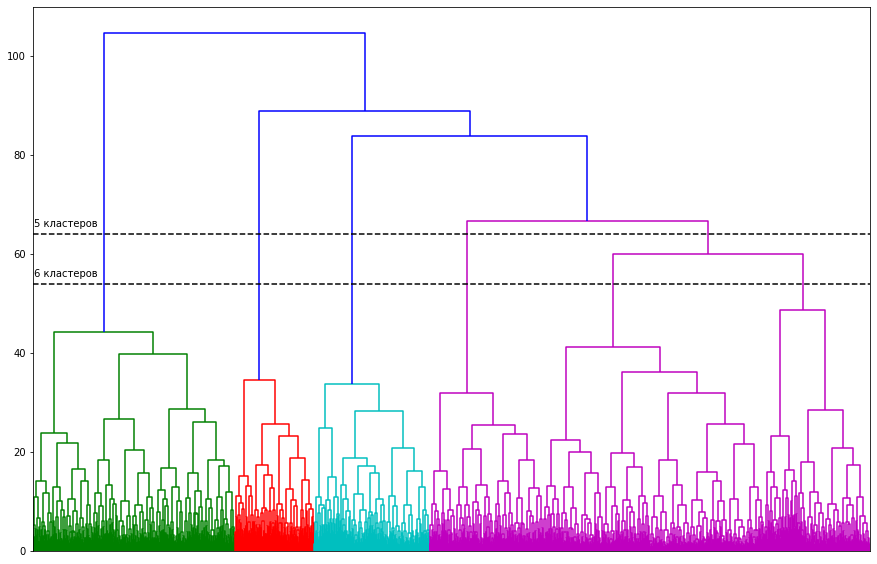

In [21]:
linked = linkage(X_sc, method = 'ward') 

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.text(35, 66, '5 кластеров', ha='left', va='center')
plt.hlines(y=64, xmin=-1, xmax=40000, linestyle='--')
plt.text(35, 56, '6 кластеров', ha='left', va='center')
plt.hlines(y=54, xmin=-1, xmax=40000, linestyle='--')
plt.xticks([])
plt.show() 

На дендрограмме получилось 4 кластера, однако крайний справа, на мой взгляд, слишком большой - примерно половина от общего количества, поэтому можно предположить наличие 5 кластеров по линиям пересечения пунктиром. Также можно было бы предположить 6 кластеров, которые были бы чуть более равномерно распределены, однако в условиях нашей задачи указано количество кластеров - 5, поэтому остановимся на этом.

### Обучение модели кластеризации на основании алгоритма K-Means

Зададим модель k_means с количеством кластеров, равное 5:

In [22]:
km = KMeans(n_clusters = 5, random_state=0)

Применяем алгоритм к данным и формируем вектор кластеров:

In [23]:
labels = km.fit_predict(X_sc)

Сохраняем метки кластера в поле нашего датасета:

In [24]:
df['cluster'] = labels

Выведем статистику по средним значениям наших признаков по кластеру, для удобства восприятия изменим номера кластеров

In [25]:
df['cluster'] += 1
df.groupby(['cluster']).mean().T

cluster,1,2,3,4,5
gender,0.502473,0.522078,0.495050,0.485737,0.560335
near_location,0.959446,0.862338,0.000000,1.000000,0.976105
partner,0.783383,0.470130,0.463366,0.350238,0.356033
promo_friends,0.574679,0.306494,0.079208,0.240095,0.229391
phone,1.000000,0.000000,1.000000,1.000000,0.998805
contract_period,10.884273,4.787013,2.352475,1.948494,2.665472
group_visits,0.543027,0.425974,0.215842,0.341521,0.473118
age,29.980218,29.301299,28.477228,28.167987,30.127838
avg_additional_charges_total,160.706969,143.957664,135.457501,131.622204,161.724258
month_to_end_contract,9.950544,4.475325,2.198020,1.856577,2.455197


В таблице слишком много разнородных значений, чтобы сделать полноценный анализ, однако, можно выделить, что меньше всего ушедших клиентов в 1 и 5 кластере, также 1й кластер сильно выделяется на фоне остальных по совокупности показателей, которые мы выше определили, как способствующие лояльности, т.е в этом кластере достаточно много пользователей, которые живут рядом с фитнес-центром, пришли по акции "приведи друга", чаще ходят на групповые занятия, имеют долговременные абонементы и т.п, гендер распределен по кластерам достаточно равномерно. 

Создадим список логических и дискретных признаков, а последним поместим сам Отток для удобста визуализации:

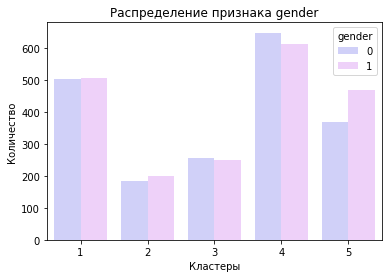

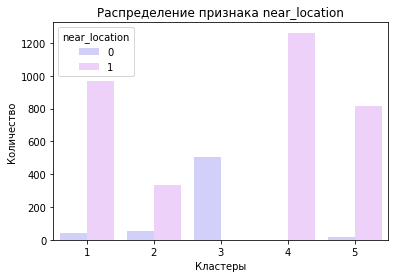

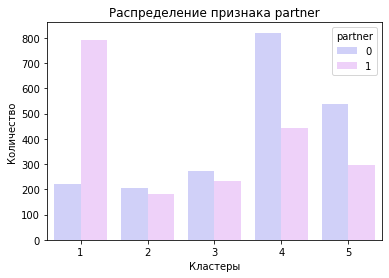

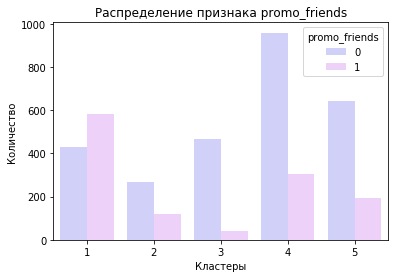

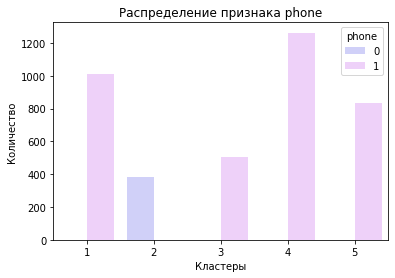

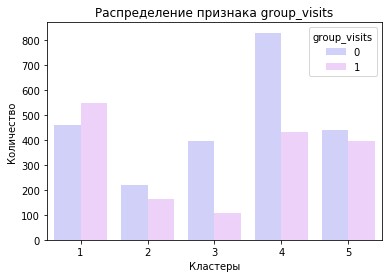

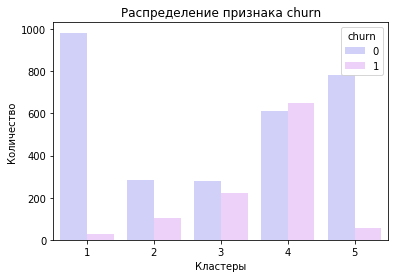

In [26]:
lists = (['gender', 
          'near_location', 
          'partner', 
          'promo_friends', 
          'phone',
          'group_visits', 
          'churn'])

color_palette = ['#c9c9ff', '#f1cbff']

fig, ax = plt.subplots()
for column in lists:
    plt.title("Распределение признака "+ column)
    sns.countplot(data = df,
                  x = 'cluster', 
                  hue = column, 
                  palette = color_palette)
    plt.xlabel('Кластеры')
    plt.ylabel("Количество")
    
    plt.show()

1 кластер
- Гендер распределен равномерно
- Местоположение клиентов в подавляющем большинстве рядом с фитнес-центром
- Клиенты пришли в основном от компаний-партнеров
- Чуть больше половины пришли по акции «приведи друга»
- Имеют контактные данные
- Чуть больше половины посещают групповые занятия
- Максимально лояльные клиенты

2 кластер
- Гендер распределен практически равномерно
- Местоположение клиентов в большинстве рядом с фитнес-центром, однако в половину меньше, чем в 1 кластере
- Клиенты пришли примерно в одинаковом количестве сами или от компаний-партнеров
- Примерно 2/3 пришли без акции «приведи друга»
- Не имеют контактные данные
- Чуть больше половины не посещают групповые занятия
- Примерно 2/3 клиентов лояльны

3 кластер
- Гендер распределен равномерно
- Местоположение клиентов далеко от фитнес-центра
- Клиенты пришли примерно в одинаковом количестве сами или от компаний-партнеров
- В основном пришли без акции «приведи друга»
- Имеют контактные данные
- Примерно ¾ клиентов посещают групповые занятия
- Лояльных клиентов чуть больше, чем попавших в отток

4 кластер
- Гендер распределен равномерно
- Местоположение клиентов рядом с фитнес-центром
- Примерно 2/3 клиентов пришли не от компаний-партнеров
- Примерно ¾ пришли без акции «приведи друга»
- Имеют контактные данные
- Примерно 2/3 клиентов не посещают групповые занятия
- Лояльных клиентов чуть меньше, чем попавших в отток

5 кластер
- Гендер распределен почти равномерно
- Местоположение клиентов в большинстве случаев рядом с фитнес-центром
- Примерно 2/3 клиентов пришли не от компаний-партнеров
- Примерно ¾ пришли без акции «приведи друга»
- Имеют контактные данные
- Примерно в равных долях посещают и не посещают групповые занятия
- В подавляющем большинстве лояльные клиенты

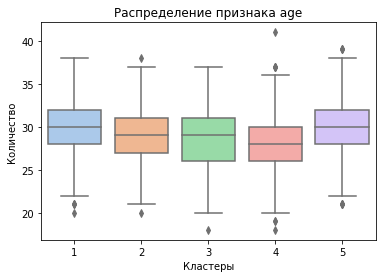

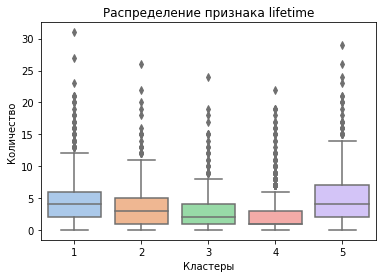

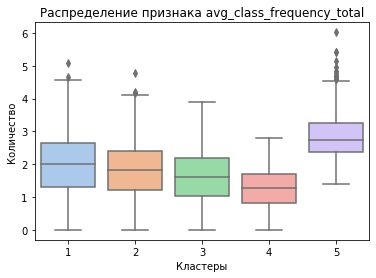

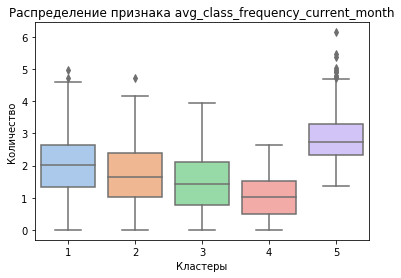

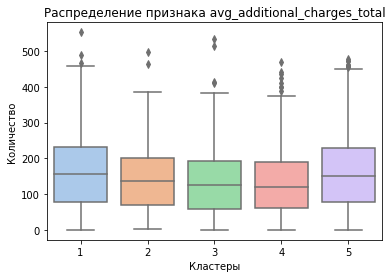

In [27]:
lists_2 = (['age', 
            'lifetime',
            'avg_class_frequency_total',
            'avg_class_frequency_current_month', 
            'avg_additional_charges_total'])

fig, ax = plt.subplots()
for column in lists_2:
    plt.title("Распределение признака " + column)
    sns.boxplot(data = df, 
                x ='cluster', 
                y = column, 
                palette = 'pastel')
    plt.xlabel('Кластеры')
    plt.ylabel('Количество')
    plt.show()

1 кластер
-	Средний возраст 30 лет
-	Lifetime – медианное время около 4 месяцев
-	Cредняя частота посещений в неделю за все время с начала действия абонемента – 1-3 раза в неделю
-	Средняя частота посещений в неделю за предыдущий месяц – также 1-3 раза в неделю
-	Суммарная выручка от других услуг фитнес-центра – примерно 80-220 у.е. в среднем

2 кластер
-	Средний возраст около 29 лет
-	Lifetime – медианное время около 3 месяцев
-	Cредняя частота посещений в неделю за все время с начала действия абонемента – 1-3 раза в неделю, чуть реже, чем в 1 кластере
-	Средняя частота посещений в неделю за предыдущий месяц – также 1-3 раза в неделю
-	Суммарная выручка от других услуг фитнес-центра – примерно 70-200 у.е. в среднем

 3 кластер
-	Возраст примерно 26-31 год
-	Lifetime – медианное время около 2 месяцев
-	Cредняя частота посещений в неделю за все время с начала действия абонемента – 1-2 (иногда 3) раза в неделю
-	Средняя частота посещений в неделю за предыдущий месяц – также 1-2 (иногда 3)  раза в неделю
-	Суммарная выручка от других услуг фитнес-центра – примерно 60-200 у.е. в среднем

4 кластер
-	Возраст примерно 26-30 лет
-	Lifetime – всего около 2 месяцев
-	Cредняя частота посещений в неделю за все время с начала действия абонемента – до 2х раз в неделю, медиана стремится к 1 р/н
-	Средняя частота посещений в неделю за предыдущий месяц – также до 2х раз в неделю
-	Суммарная выручка от других услуг фитнес-центра – примерно 60-200 у.е. в среднем, похоже на 3 кластер

5 кластер
-	Средний возраст в среднем 30 лет
-	Lifetime – медианное время около 5 месяцев, в среднем самый длительный по посещениям кластер
-	Cредняя частота посещений в неделю за все время с начала действия абонемента – 2-4 раза в неделю
-	Средняя частота посещений в неделю за предыдущий месяц – также 2-4 раза в неделю
-	Суммарная выручка от других услуг фитнес-центра – примерно 80-220 у.е. в среднем, как и в 1 кластере

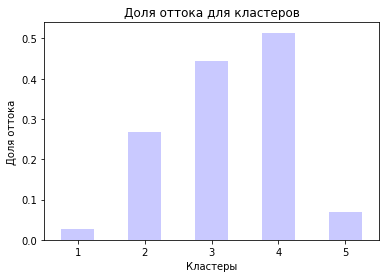

In [28]:
df.groupby('cluster')['churn'].agg('mean').plot(kind='bar', color = ['#c9c9ff'])

plt.title('Доля оттока для кластеров')
plt.xlabel('Кластеры')
plt.ylabel('Доля оттока')
plt.xticks(rotation=0)
plt.show()

По графику видим, что 
- самые склонные к оттоку - 3 и 4 кластеры
- самые лояльные 1 и 5 кластеры
- 2 кластер примерно на 25% склонен к оттоку

## Выводы и рекомендации

### Общие итоги:

«Культурист-датасаентист» предоставил сведения в csv-файлах. Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. Набор данных включает следующие поля:

- **'Churn'** — факт оттока в текущем месяце;
- Текущие поля в датасете:
    - Данные клиента за предыдущий до проверки факта оттока месяц:
        - **'gender'** — пол;
        - **'Near_Location'** — проживание или работа в районе, где находится фитнес-центр;
        - **'Partner'** — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
        - **'Promo_friends'** — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
        - **'Phone'** — наличие контактного телефона;
        - **'Age'** — возраст;
        - **'Lifetime'** — время с момента первого обращения в фитнес-центр (в месяцах).
- Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
    - **'Contract_period'** — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
    - **'Month_to_end_contract'** — срок до окончания текущего действующего абонемента (в месяцах);
    - **'Group_visits'** — факт посещения групповых занятий;
    - **'Avg_class_frequency_total'** — средняя частота посещений в неделю за все время с начала действия абонемента;
    - **'Avg_class_frequency_current_month'** — средняя частота посещений в неделю за предыдущий месяц;
    - **'Avg_additional_charges_total'** — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.
    
Данные хорошие, распределены корректно, однако неравномерно, в них нет временных показателей (дат). Пропусков нет. Всего мы имеем данные о 4 тыс клиентов. Дубликатов нет. Названия столбцов приведены к нижнему регистру.

На данном этапе можно сказать:
- чуть больше остаются те, кто живет рядом
- больше пользователи склонны оставаться по партнерским программам и акциям "приведи друга"
- чаще уходят те, кто заключил краткосрочные контракты, в отличии от тех, кто занимается по долгосрочным.

Мы можем сказать, что пол и наличие контактного телефона скорей всего не влияют на отток клиентов, а все остальные показатели имеют обратное влияние на целевую переменную в разной степени силы.

По матрице корреляций мы не наблюдаем сильно скоррелированных признаков для целевой переменной. Однако, мы видим, что есть корреляция между показателями, описывающими длительность абонементов, вероятно, наблюдение было проведено на этапе близком к покупке каждого из абонементов. Также стоит отметить корреляцию признаков, которые описывают частоту посещения фитнес-центров - она говорит о том, что скорей всего, клиенты посещают занятия какое-то постоянное для себя количество раз, поэтому данный показатель не изменяется во времени.

Мы разбили данные на обучающую и валидационную выборку в соотношении 80% и 20%, функцией train_test_split(), с параметром random_state = 0. Обучили модель  на train-выборке двумя способами:
- логистической регрессией
    - Accuracy: 0.93
    - Precision: 0.86
    - Recall: 0.83
- случайным лесом
    - Accuracy: 0.92
    - Precision: 0.84
    - Recall: 0.82

Можно сказать, что модель логистической регрессии показала себя лучше, чем модель случайного леса по всем показателям:
- доля правильных ответов (accuracy),
- точность (precision),
- полнота (recall).

Мы построили матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисовали дендрограмму. На дендрограмме получилось 4 кластера, т.к. крайний справа, слишком объемный - примерно половина от общего количества, поэтому мы предположили наличие 5 кластеров по линиям пересечения пунктиром.

Мы обучили модель кластеризации на основании алгоритма K-Means и спрогнозировали кластеры клиентов на основании предыдущего пункта и условий задачи равным 5. Далее, на этих условиях построили таблицу из средник значений признаков для кластеров.

В таблице большой объем разнородных значений, чтобы сделать полноценный анализ, однако, можно выделить, что меньше всего ушедших клиентов в 1 и 5 кластере, также 1й кластер сильно выделяется на фоне остальных по совокупности показателей, которые мы выше определили, как способствующие лояльности, т.е в этом кластере достаточно много пользователей, которые живут рядом с фитнес-центром, пришли по акции "приведи друга", чаще ходят на групповые занятия, имеют долговременные абонементы и т.п, гендер распределен по кластерам достаточно равномерно.

Для удобста визуализации и составления выводов мы построили распределения признаков по кластерам и получили следующие характеристики кластеров:

**1 кластер**
-	Гендер распределен равномерно
-	Местоположение клиентов в подавляющем большинстве рядом с фитнес-центром
-	Клиенты пришли в основном от компаний-партнеров
-	Чуть больше половины пришли по акции «приведи друга»
-	Имеют контактные данные
-	Чуть больше половины посещают групповые занятия
-	Максимально лояльные клиенты
-	Средний возраст 30 лет
-	Lifetime – медианное время около 4 месяцев
-	Cредняя частота посещений в неделю за все время с начала действия абонемента – 1-3 раза в неделю
-	Средняя частота посещений в неделю за предыдущий месяц – также 1-3 раза в неделю
-	Суммарная выручка от других услуг фитнес-центра – примерно 80-220 у.е. в среднем

**2 кластер**
-	Гендер распределен практически равномерно
-	Местоположение клиентов в большинстве рядом с фитнес-центром, однако в половину меньше, чем в 1 кластере
-	Клиенты пришли примерно в одинаковом количестве сами или от компаний-партнеров
-	Примерно 2/3 пришли без акции «приведи друга»
-	Не имеют контактные данные
-	Чуть больше половины не посещают групповые занятия
-	Примерно 2/3 клиентов лояльны
-	Средний возраст около 29 лет
-	Lifetime – медианное время около 3 месяцев
-	Cредняя частота посещений в неделю за все время с начала действия абонемента – 1-3 раза в неделю, чуть реже, чем в 1 кластере
-	Средняя частота посещений в неделю за предыдущий месяц – также 1-3 раза в неделю
-	Суммарная выручка от других услуг фитнес-центра – примерно 70-200 у.е. в среднем

**3 кластер**
-	Гендер распределен равномерно
-	Местоположение клиентов далеко от фитнес-центра
-	Клиенты пришли примерно в одинаковом количестве сами или от компаний-партнеров
-	В основном пришли без акции «приведи друга»
-	Имеют контактные данные
-	Примерно ¾ клиентов посещают групповые занятия
-	Лояльных клиентов чуть больше, чем попавших в отток
-	Возраст примерно 26-31 год
-	Lifetime – медианное время около 2 месяцев
-	Cредняя частота посещений в неделю за все время с начала действия абонемента – 1-2 (иногда 3) раза в неделю
-	Средняя частота посещений в неделю за предыдущий месяц – также 1-2 (иногда 3)  раза в неделю
-	Суммарная выручка от других услуг фитнес-центра – примерно 60-200 у.е. в среднем

**4 кластер**
-	Гендер распределен равномерно
-	Местоположение клиентов рядом с фитнес-центром
-	Примерно 2/3 клиентов пришли не от компаний-партнеров
-	Примерно ¾ пришли без акции «приведи друга»
-	Имеют контактные данные
-	Примерно 2/3 клиентов не посещают групповые занятия
-	Лояльных клиентов чуть меньше, чем попавших в отток
-	Возраст примерно 26-30 лет
-	Lifetime – всего около 2 месяцев
-	Cредняя частота посещений в неделю за все время с начала действия абонемента – до 2х раз в неделю, медиана стремится к 1 р/н
-	Средняя частота посещений в неделю за предыдущий месяц – также до 2х раз в неделю
-	Суммарная выручка от других услуг фитнес-центра – примерно 60-200 у.е. в среднем, похоже на 3 кластер

**5 кластер**
-	Гендер распределен почти равномерно
-	Местоположение клиентов в большинстве случаев рядом с фитнес-центром
-	Примерно 2/3 клиентов пришли не от компаний-партнеров
-	Примерно ¾ пришли без акции «приведи друга»
-	Имеют контактные данные
-	Примерно в равных долях посещают и не посещают групповые занятия
-	В подавляющем большинстве лояльные клиенты
-	Средний возраст в среднем 30 лет
-	Lifetime – медианное время около 5 месяцев, в среднем самый длительный по посещениям кластер
-	Cредняя частота посещений в неделю за все время с начала действия абонемента – 2-4 раза в неделю
-	Средняя частота посещений в неделю за предыдущий месяц – также 2-4 раза в неделю
-	Суммарная выручка от других услуг фитнес-центра – примерно 80-220 у.е. в среднем, как и в 1 кластере

Далее мы посчитали долю оттока по кластерам и получили:
- самые склонные к оттоку - 3 и 4 кластеры
- самые лояльные 1 и 5 кластеры
- 2 кластер примерно на 25% склонен к оттоку

### Вывод

**На основании проведенного исследования можно сказать:**
-	Более перспективная модель ML была модель логистической регрессии.
-	Посетителей фитнес-центров можно разделить на 5 групп (кластеров) с различными характеристиками
-	Наиболее перспективными явились 1 и 5 группы, которые характеризуются такими показателями, как:
    -	Средний возраст 30 лет
    -	Средняя частота посещений в неделю за все время с начала действия абонемента – 1-3 раза или чаще, посещают групповые занятия
    -	Заключают длительные контракты
    -	Местоположение клиентов в подавляющем большинстве рядом с фитнес-центром
    -	Приходят от компаний-партнеров, по акции «приведи друга»
    -	Суммарная выручка от других услуг фитнес-центра – примерно 80-220 у.е. – больше чем в других группах


### Рекомендации

По итогу можно предложить такие рекомендации:

-	Рассмотреть возможность проводить акции для потенциальных клиентов в компаниях-партнерах, а именно для людей, соответствующих критериям:
    -	Средний возраст 30 лет
    -	Местоположение клиентов в подавляющем большинстве рядом с фитнес-центром
-	Рассмотреть возможность проводить акции в рамках приобретения длительных контрактов
-	Возможно, рассмотреть варианты различных наполнений для длительных контрактов – наличие длительных контрактов на любой вкус
-	Поддерживать удобство расписания для максимального количества клиентов в части групповых занятий и их разнообразие
-	Развивать инфраструктуру каждого конкретного фитнес-центра - кафе, спорт-товары, косметический и массажный салон.